LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사함
  - 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함. 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
  - 같은 클래스의 데이터는 최대한 근접해서, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑을 함

LDA 차원 축소 방식
  - 특정 공간상에서 클래스 분리를 최대화 하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함
  - 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

LDA 절차
  - 클래스 간 분산 과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영함
    1. 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함
    2. 클래스 내부 분산 행렬을 $S_W$, 클래스 간 분산 행렬을 $S_B$ 라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있음
$${S_W}^TS_B=[e_1\cdots e_n]\begin{bmatrix}\lambda_1 & \cdots & 0 \\\cdots & \cdots & \cdots \\0 & \cdots & \lambda_n\end{bmatrix} \begin{bmatrix}{e_1}^T \\\cdots \\{e_n}^T \end{bmatrix}$$
    3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출함
    4. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출함. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새롭게 입력 데이터를 변환함

붓꽃 데이터 셋에 LDA 적용하기

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [3]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


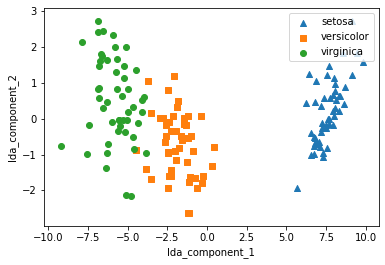

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right');plt.xlabel('lda_component_1');plt.ylabel('lda_component_2');plt.show()